# BANK CUSTOMER SATISFACTION PREDICTION USING CNN

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

print(tf.__version__)

2.13.0


In [2]:
df = pd.read_csv('/Harshal/CDAC/Project/new_project/notebook/dataset/bank_data.csv')

In [3]:
df.shape

(76020, 371)

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


## X and Y Split

In [5]:
x = df.drop(labels=['ID', 'TARGET'], axis = 1)
x.shape

(76020, 369)

In [6]:
y = df['TARGET']

In [7]:
y.shape

(76020,)

In [8]:
df.isnull().values.any()

False

## PREPROCESSING

C:\Users\harsh\AppData\Local\Temp\ipykernel_16872\202160929.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(y, sort = True)


([<matplotlib.axis.XTick at 0x1eeac1864a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

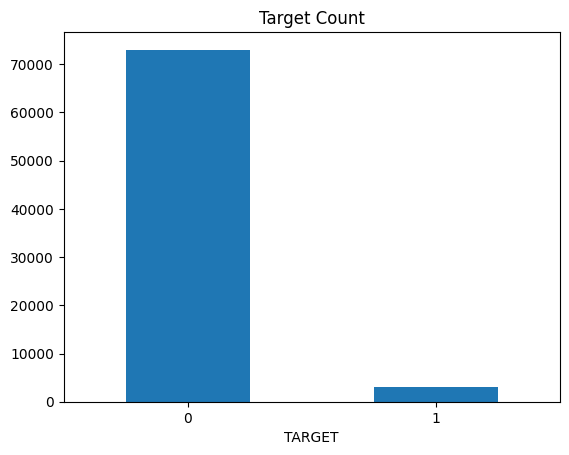

In [9]:
count_class = pd.value_counts(y, sort = True)

count_class.plot(kind = 'bar', rot=0 )

plt.title('Target Count')

plt.xticks(range(2))


In [10]:
satisfied = df[df['TARGET']==0]
unsatisfied = df[df['TARGET']==1]

In [11]:
print(satisfied.shape, unsatisfied.shape)

(73012, 371) (3008, 371)


In [12]:
df.describe

<bound method NDFrame.describe of            ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
76015  151829     2     48                 0.0                      0.0   
76016  151830     2     39                 0.0                      0.0   
76017  151835     2     23                 0.0                      0.0   
76018  151836     2     25                 0.0                      0.0   
76019  151838     2     46                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0     

In [13]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [14]:
y.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

##### As we can see dataset imbalanced between statisfied(0) and unsatisfied(1), where statisfied(0) are 73012 and unsatisfied(1) are 3008.
##### So in Order to make dataset balanced we have used technique called SMOTETomek

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
smk = SMOTETomek(random_state=27)
x_res,y_res=smk.fit_resample(x,y)

In [17]:
x_res.shape,y_res.shape

((142292, 369), (142292,))

In [18]:
from collections import Counter
print('original datasets shape {}'.format(Counter(y)))
print('original datasets shape {}'.format(Counter(y_res)))

original datasets shape Counter({0: 73012, 1: 3008})
original datasets shape Counter({0: 71146, 1: 71146})


C:\Users\harsh\AppData\Local\Temp\ipykernel_16872\2611558766.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(y_res, sort = True)


([<matplotlib.axis.XTick at 0x1eeaecb5810>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

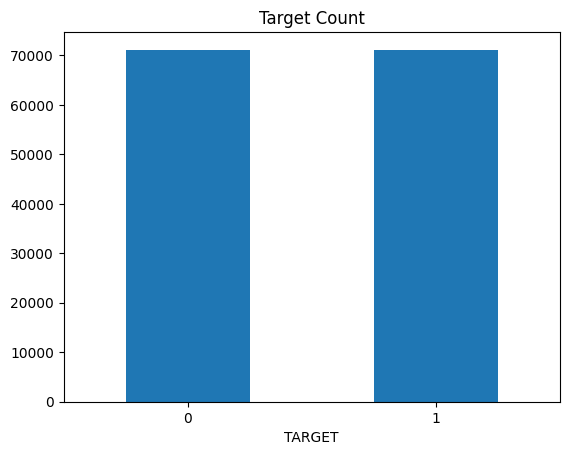

In [19]:
count_class = pd.value_counts(y_res, sort = True)

count_class.plot(kind = 'bar', rot=0 )

plt.title('Target Count')

plt.xticks(range(2))

In [20]:
type(x_res)

pandas.core.frame.DataFrame

##### TRAIN TEST SPLIT & REMOVING QUASSI CONSTANTS, DUPLICATE COLUMNS

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

In [23]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [24]:
x_train.shape,x_test.shape

((113833, 266), (28459, 266))

In [25]:
type(x_train)

numpy.ndarray

In [26]:
sum(rm_f.get_support())

266

In [27]:
x_train_t = x_train.T
x_test_t = x_test.T

In [28]:
type(x_train_t)

numpy.ndarray

In [29]:
x_train_t= pd.DataFrame(x_train_t)
x_test_t= pd.DataFrame(x_test_t)

In [30]:
x_train_t.shape, x_test_t.shape

((266, 113833), (266, 28459))

In [31]:
x_train_t.duplicated().sum()

17

In [32]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [33]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True,

In [34]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [35]:
x_train.shape, x_test.shape

((113833, 249), (28459, 249))

##### STANDARD SCALING DATASET

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [38]:
x_train.shape,x_test.shape

((113833, 249), (28459, 249))

In [39]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [40]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## MODEL BUILDING 

In [41]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.optimizers import Adam

In [42]:
model = Sequential()

#Convo 1D Layer1
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (x_train.shape[1], 1)))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.15))

In [43]:
#Convo 1D Layer2
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.15))

In [44]:
#Convo 1D Layer3
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.2))

In [45]:
#Convo 1D Layer4
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.2))

In [46]:
model.add(Flatten())

In [47]:
# Dense Layer of CNN
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 247, 32)           128       
                                                                 
 batch_normalization (Batch  (None, 247, 32)           128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 123, 32)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 123, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 121, 64)           6208      
                                                                 
 batch_normalization_1 (Bat  (None, 121, 64)           2

In [49]:
opt = Adam(learning_rate=0.00005)

In [50]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
#Traning the CNN Model with 10 epochs
epo_train = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
3558/3558 [==============================] - 157s 43ms/step - loss: 0.4787 - accuracy: 0.7857 - val_loss: 0.3925 - val_accuracy: 0.8385
Epoch 2/10
3558/3558 [==============================] - 149s 42ms/step - loss: 0.3975 - accuracy: 0.8264 - val_loss: 0.3570 - val_accuracy: 0.8471
Epoch 3/10
3558/3558 [==============================] - 156s 44ms/step - loss: 0.3752 - accuracy: 0.8380 - val_loss: 0.3373 - val_accuracy: 0.8594
Epoch 4/10
3558/3558 [==============================] - 125s 35ms/step - loss: 0.3587 - accuracy: 0.8480 - val_loss: 0.3273 - val_accuracy: 0.8630
Epoch 5/10
3558/3558 [==============================] - 122s 34ms/step - loss: 0.3481 - accuracy: 0.8520 - val_loss: 0.3156 - val_accuracy: 0.8678
Epoch 6/10
3558/3558 [==============================] - 126s 36ms/step - loss: 0.3399 - accuracy: 0.8551 - val_loss: 0.3284 - val_accuracy: 0.8630
Epoch 7/10
3558/3558 [==============================] - 120s 34ms/step - loss: 0.3334 - accuracy: 0.8605 - val_loss: 0

# MODEL PREDICTION

In [52]:
predict_x=model.predict(x_test)

890/890 [==============================] - 4s 5ms/step


In [53]:
predict_x

array([[0.7176233 ],
       [0.08172893],
       [0.9898885 ],
       ...,
       [0.02873948],
       [0.02693874],
       [0.83082545]], dtype=float32)

In [54]:
type(predict_x)

numpy.ndarray

In [55]:
y_pred1=[]
for i in predict_x:
  if i <= 0.5:
    y_pred1.append(0)
  else:
    y_pred1.append(1)

In [56]:
y_pred1.count(0)

13757

In [57]:
y_pred1.count(1)

14702

In [58]:
print(type(y_pred1))

<class 'list'>


In [59]:
print((y_pred1[182]),(y_test[182]))
print((y_pred1[149]),(y_test[149]))
print((y_pred1[210]),(y_test[210]))

1 1
1 1
1 1


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[12386  1942]
 [ 1371 12760]]


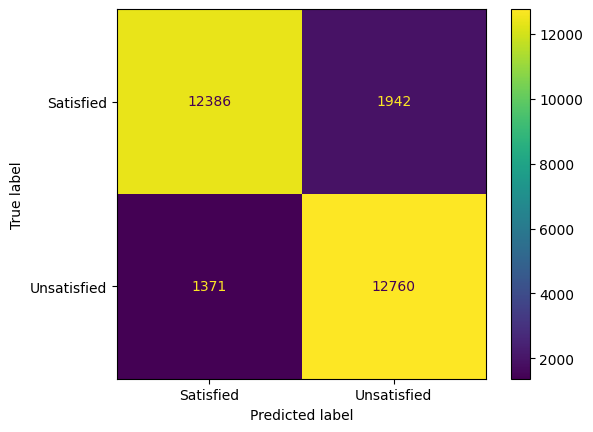

In [61]:
ConfusionMatrixDisplay(cm, display_labels=['Satisfied','Unsatisfied']).plot()

In [62]:
print(y_pred1)

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 

In [63]:
acc_cm = accuracy_score(y_test, y_pred1)

In [64]:
print(acc_cm)

0.8835869145085913


In [65]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     14328
           1       0.87      0.90      0.89     14131

    accuracy                           0.88     28459
   macro avg       0.88      0.88      0.88     28459
weighted avg       0.88      0.88      0.88     28459



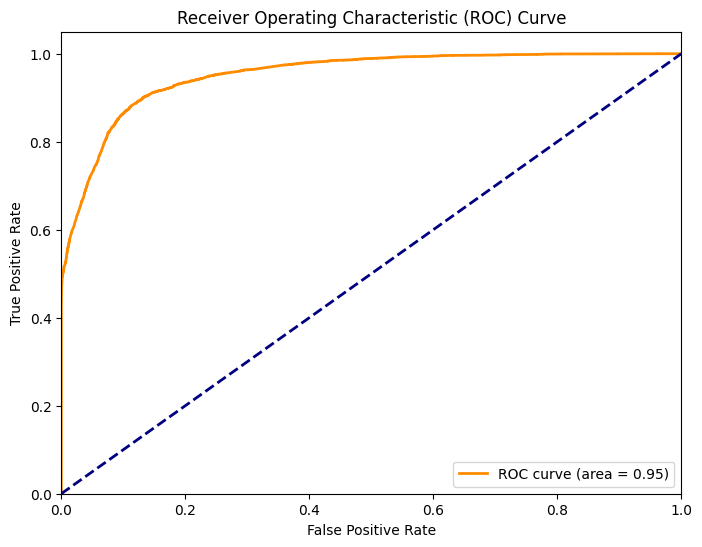

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, predict_x)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))